<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL_Marinoshenko_Tetiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [39]:
import pandas as pd

In [40]:
!pip install mysql-connector-python

In [41]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [42]:
con = mysql.connector.connect(user='student', password='IAmLearningSQL',
                              host='shinkansen.proxy.rlwy.net',
                              database='employees',
                              port= 50507)

In [43]:
cursor = con.cursor()

In [44]:
import warnings
warnings.filterwarnings('ignore')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [45]:
df = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

df = pd.read_sql(df, con)
df

,hire_year,employee_count
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hire_year       16 non-null     int64
 1   employee_count  16 non-null     int64
dtypes: int64(2)
memory usage: 388.0 bytes


2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

   hire_year  employee_count
0       1985           35316
1       1986           36150
2       1987           33501
3       1988           31436
4       1989           28394


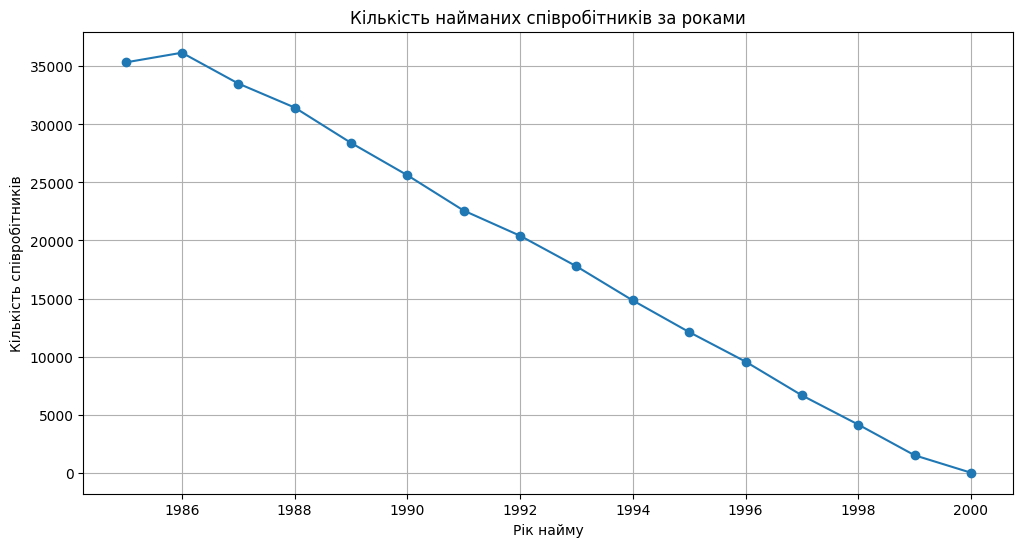

In [47]:
import matplotlib.pyplot as plt

print(df.head())

plt.figure(figsize=(12,6))
plt.plot(df['hire_year'], df['employee_count'], marker='o')
plt.title('Кількість найманих співробітників за роками')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [50]:
sql_query_years = """
SELECT
  emp_no,
  title,
  from_date,
  to_date,
  TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_on_position
FROM
  titles
WHERE
  title = 'Engineer'
  AND to_date != '9999-01-01'
ORDER BY
  years_on_position DESC;
"""

df_years = pd.read_sql(sql_query_years, con)
df_years

,emp_no,title,from_date,to_date,years_on_position
0,497807,Engineer,1989-09-27,1998-09-27,9
1,497895,Engineer,1992-11-07,2001-11-07,9
2,497911,Engineer,1993-03-22,2002-03-22,9
3,497935,Engineer,1989-02-01,1998-02-01,9
4,497951,Engineer,1989-11-12,1998-11-12,9
...,...,...,...,...,...
84015,269609,Engineer,1996-07-22,1996-07-29,0
84016,269637,Engineer,1993-09-26,1994-05-05,0
84017,269691,Engineer,1999-10-20,2000-06-23,0
84018,269731,Engineer,1998-03-11,1998-04-07,0


In [51]:
sql_query_years = """
SELECT
   TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_on_position,
   COUNT(*) AS number_of_engineer
FROM
   titles
WHERE
   title = 'Engineer'
   AND to_date != '9999-01-01'
   GROUP BY
   years_on_position
   ORDER bY
   years_on_position;
"""

df_years = pd.read_sql(sql_query_years, con)
display(df_years)

,years_on_position,number_of_engineer
0,0,3190
1,1,3167
2,2,2782
3,3,2291
4,4,6249
5,5,22346
6,6,8210
7,7,13918
8,8,14239
9,9,7628


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

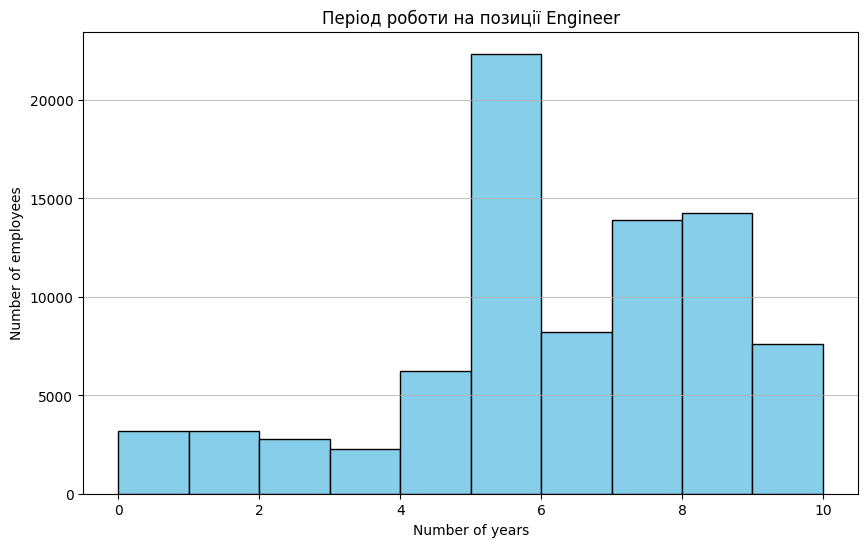

In [57]:
plt.figure(figsize=(10,6))
plt.hist(df_years['years_on_position'], weights=df_years['number_of_engineer'], bins=range(0, df_years['years_on_position'].max() +2), color='skyblue', edgecolor='black')
plt.title('Період роботи на позиції Engineer')
plt.xlabel('Number of years')
plt.ylabel('Number of employees')
plt.grid(axis='y', alpha=0.75)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [58]:
con.close()